# TOC

0. [Imports](#first-bullet)
1. [KClass Clouds](#1.0-bullet)
2. [Basic Class Analysis](#2.0-bullet)  
3. [Genres](#3.0-bullet)  

In [2]:
#Basic
import pandas as pd
import numpy as np
#Math
import scipy as sp
from random import randint
from math import exp
import operator

#Scraping
# import requests
# import json

#Youtube Data API Packages: 
# from apiclient.discovery import build
# from apiclient.errors import HttpError
# from oauth2client.tools import argparser
# from googleapiclient.discovery import build
# import argparse
# from googleapiclient.errors import HttpError

#Modeling
# from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
# from sklearn.metrics import r2_score
# from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import MultinomialNB
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.neighbors import KNeighborsRegressor
#from sklearn.cluster import KMeans
#from sklearn.svm import SVC
#from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

#NLP & Text Management
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

#Time analysis
import time
import datetime as dt
"""from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf"""

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud

%matplotlib inline
plt.style.use('classic')
sns.set_style('whitegrid')

In [3]:
df_classified = pd.read_csv('./data/classifieds/k_classified_distances_v2.csv')

df_classified.fillna('', inplace=True)

custom_pops = ['facebook', 'twitter', 'http', 'https', 'com', 'www', 'Instagram', 'instagram', 'goo', 'youtube', 
               'àƒ', 'ãƒ','ìŠ', 'íƒ', 
              'official', 'music', 'video', 'musical', 'artist']

# <a class="anchor" id="1.0-bullet">1. KClass Clouds</a>

In [3]:
#https://www.copypastecharacter.com/alphabetical-order
#https://tools.oratory.com/altcodes.html

In [4]:
ord('Š')

352

In [23]:
def print_k_word_cloud(k_class, text_col, max_entries=None, data=df_classified):
    df_for_corpus = data
    df_for_corpus[text_col] =df_for_corpus[text_col].map(lambda x: '' if 'à' in str(x) or 'Ð' in str(x) else x)
    df_for_corpus = df_for_corpus[df_for_corpus['kclass']==k_class]
    if max_entries is not None:
        df_for_corpus=df_for_corpus.iloc[0:max_entries, :]
    corpus_string4 = ''
    for i in range(df_for_corpus.shape[0]):
        corpus_string4 = corpus_string4 + str(df_for_corpus.iloc[i][text_col])

    mycloud_4 = WordCloud(width=1000, height=1000, stopwords=stopwords.words('english')+custom_pops+stopwords.words('spanish'),random_state=42,
                        collocations=False, #get rid of duplicates
                       normalize_plurals=True).generate_from_text(corpus_string4)
    plt.figure(figsize = (10, 10), facecolor = None)
    plt.imshow(mycloud_4)
    plt.axis("off")
    plt.tight_layout(pad = 0)

'Early youtubers were italian'

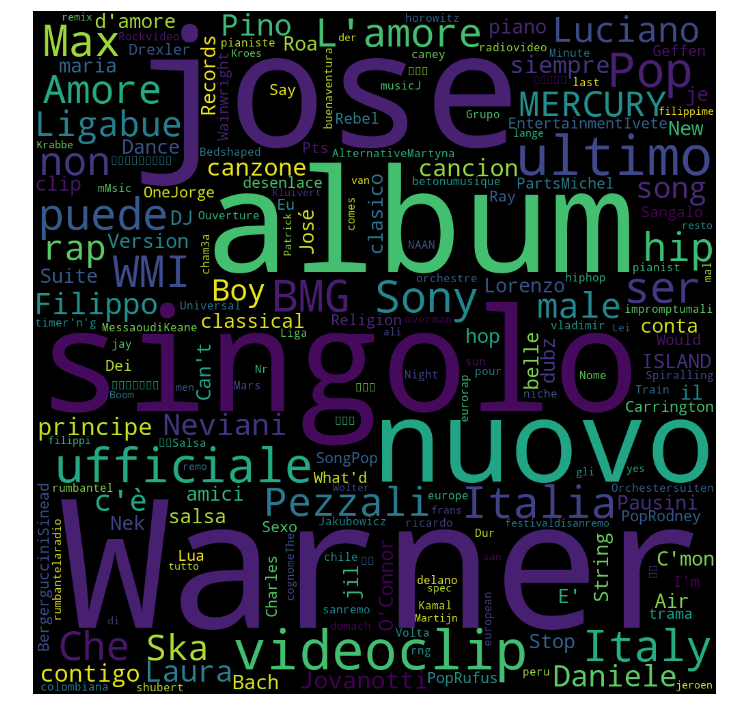

In [24]:
print_k_word_cloud(0,'tags', max_entries=100)
"Early youtubers were italian"

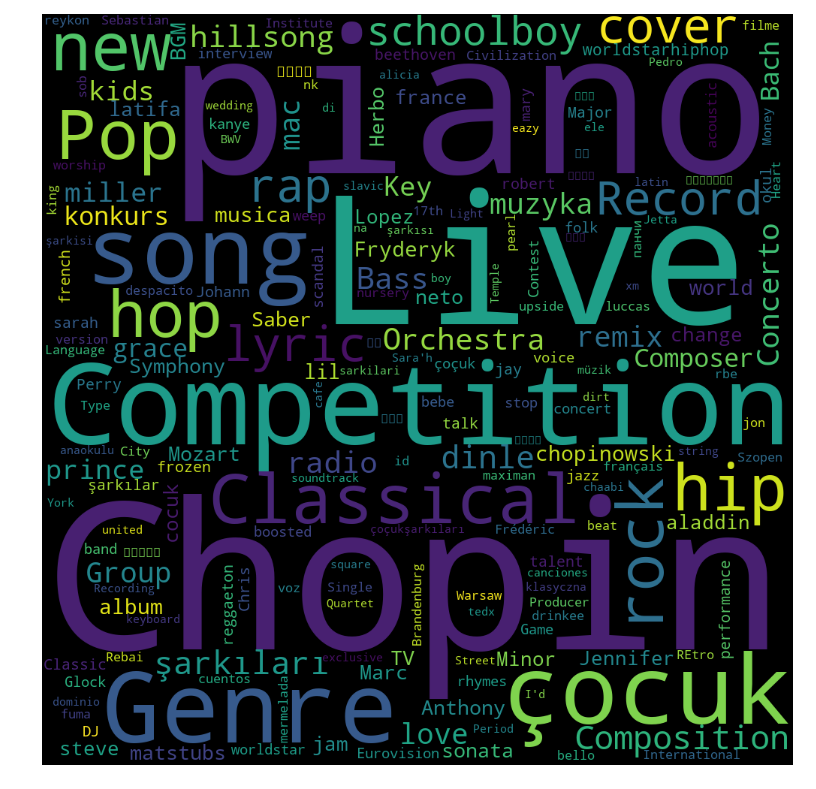

In [39]:
print_k_word_cloud(1,'tags', max_entries=200)

'HOT NEW MUSIC'

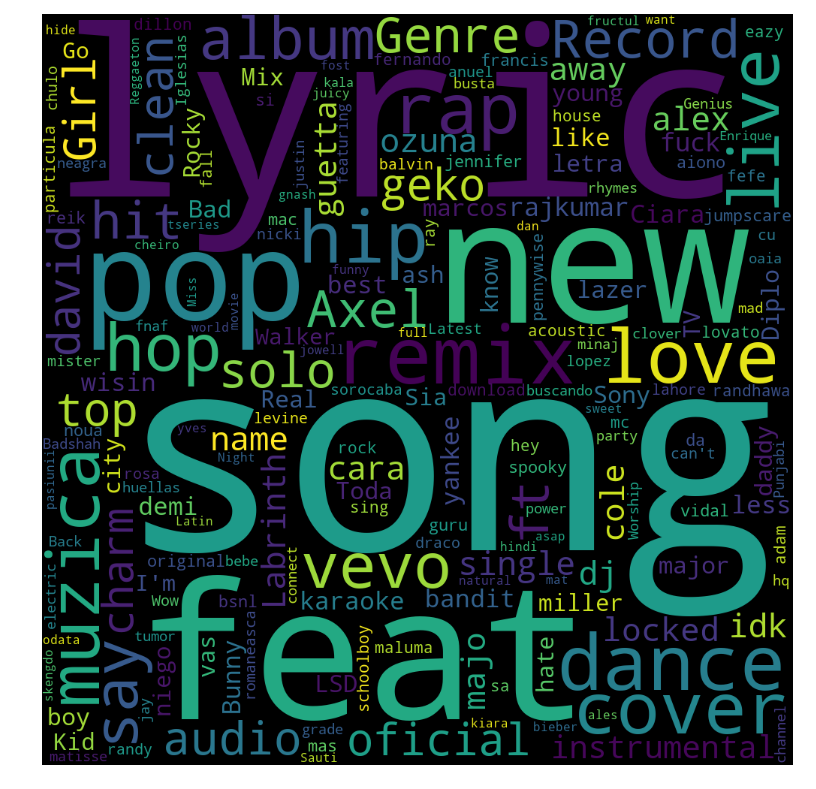

In [51]:
print_k_word_cloud(2,'tags', max_entries=200)
"HOT NEW MUSIC"

'Lemme hear some hip hop'

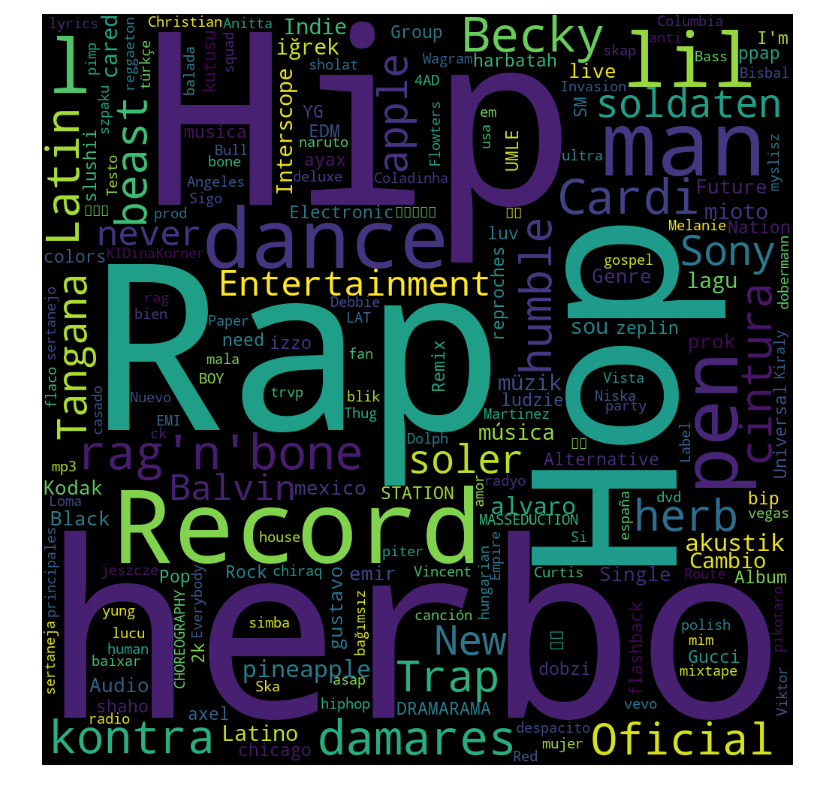

In [50]:
print_k_word_cloud(3,'tags', max_entries=100)
"Lemme hear some hip hop"

'Live Classical and jazz for the instrumentally inclined'

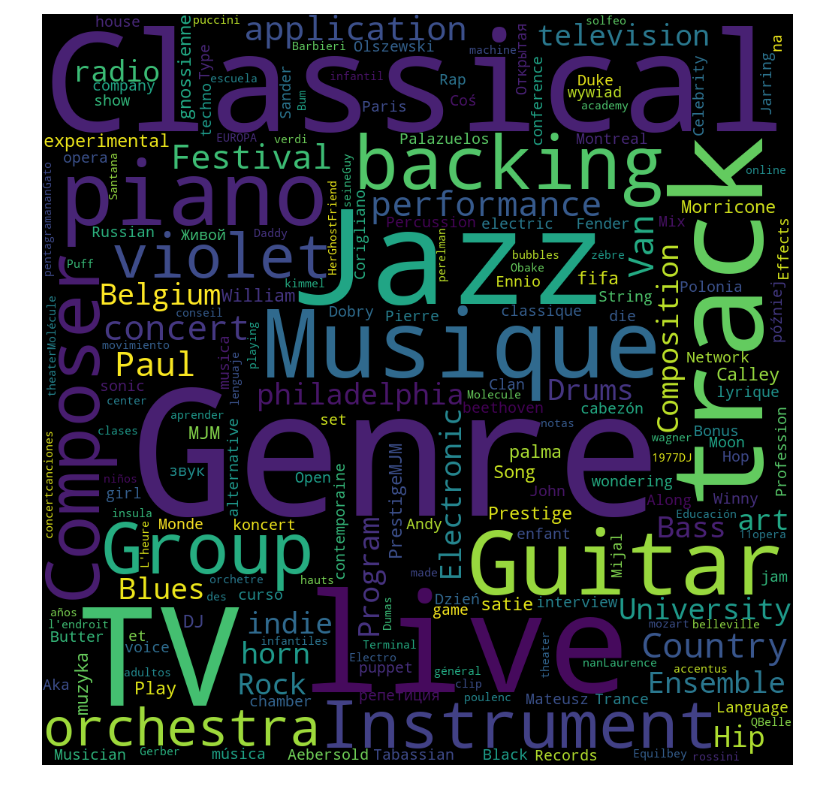

In [49]:
print_k_word_cloud(4,'tags', max_entries=100)
"Live Classical and jazz for the instrumentally inclined"

'working music'

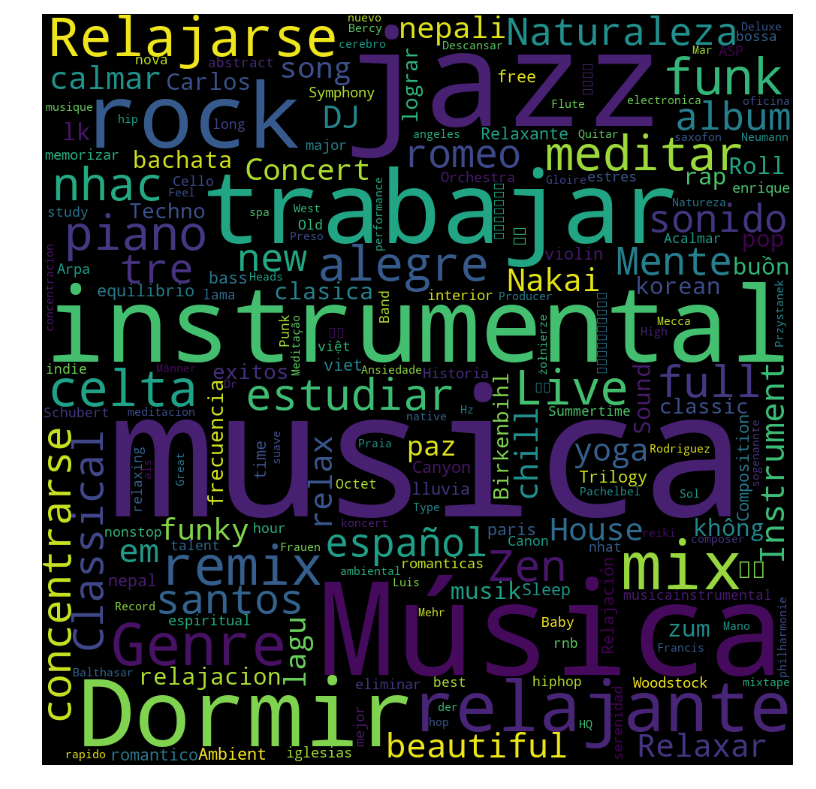

In [48]:
print_k_word_cloud(5,'tags', max_entries=100)
"working music"

'latin hip hop'

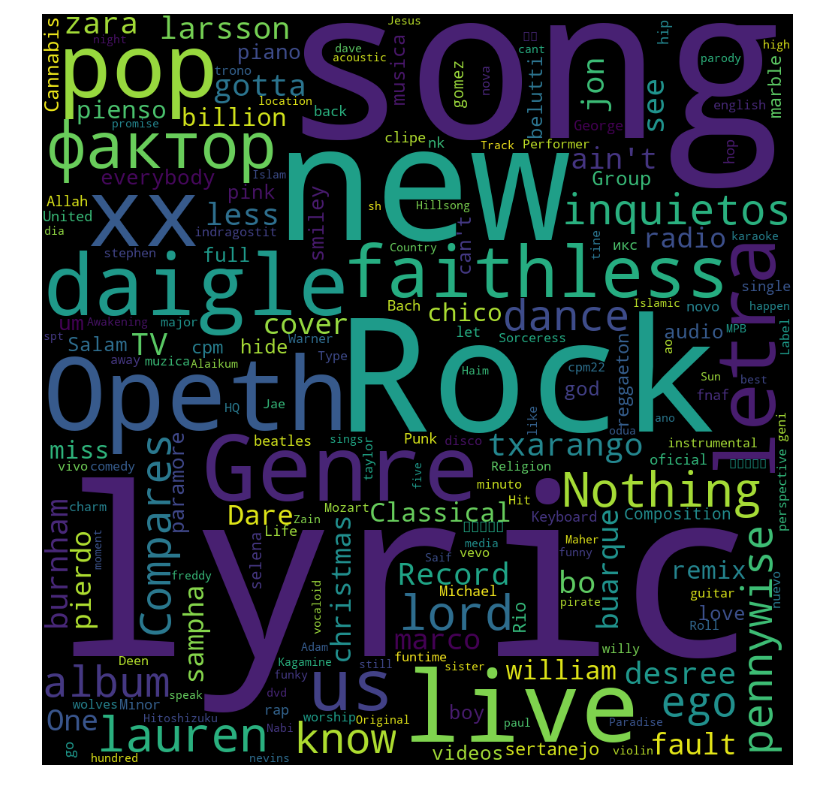

In [47]:
print_k_word_cloud(6,'tags', max_entries=100)
"latin hip hop"

'love songs, even german ones - Kontra K - Atme tief ein (Official Video)'

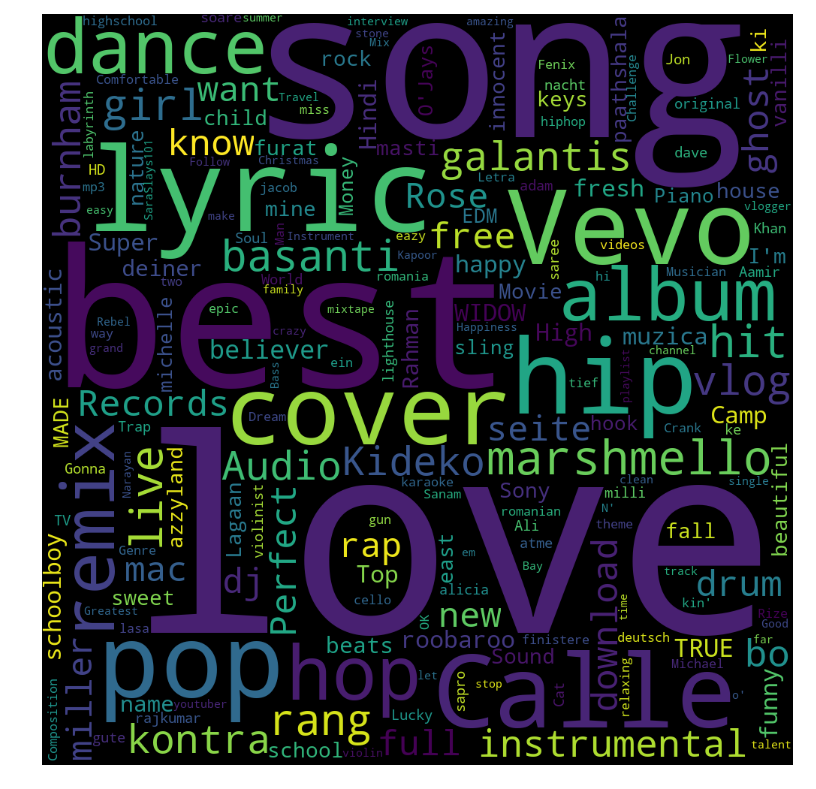

In [46]:
print_k_word_cloud(7,'tags', max_entries=100)
"""love songs, even german ones - Kontra K - Atme tief ein (Official Video)"""

'hot new tracks - remixed'

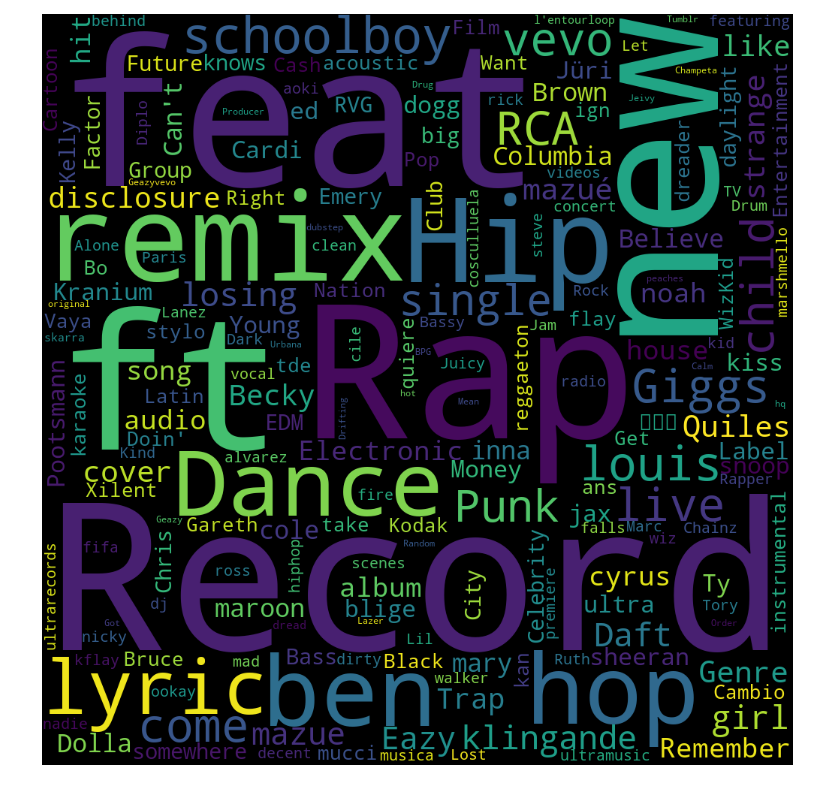

In [45]:
print_k_word_cloud(8,'tags', max_entries=100)
"hot new tracks - remixed"

'live popular artists'

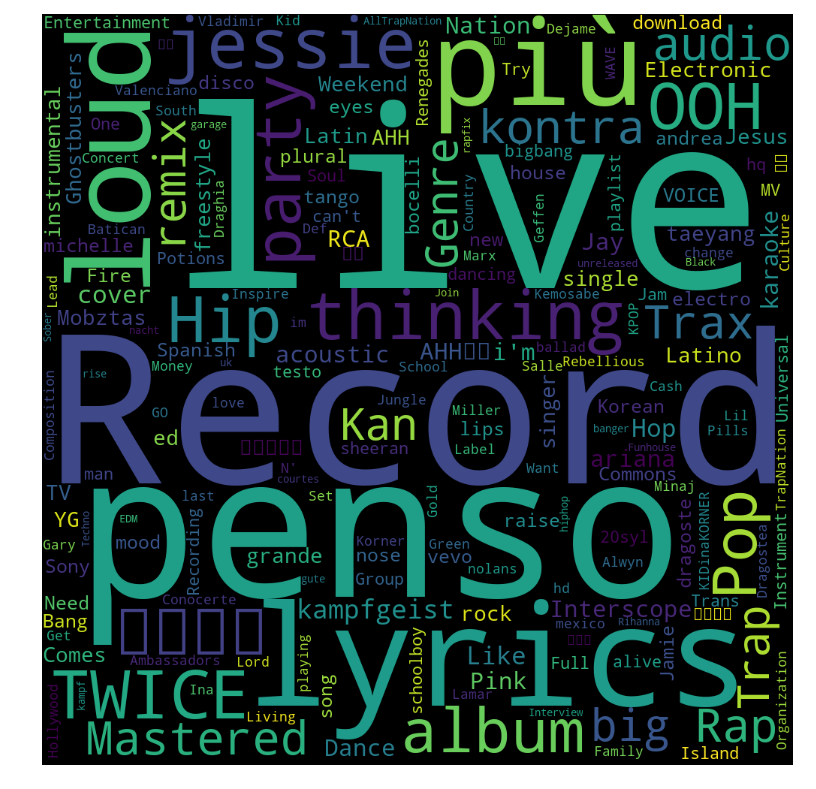

In [44]:
print_k_word_cloud(9,'tags', max_entries=100)
"live popular artists, lyrics videos"

'Chinese (dizi music), festivals'

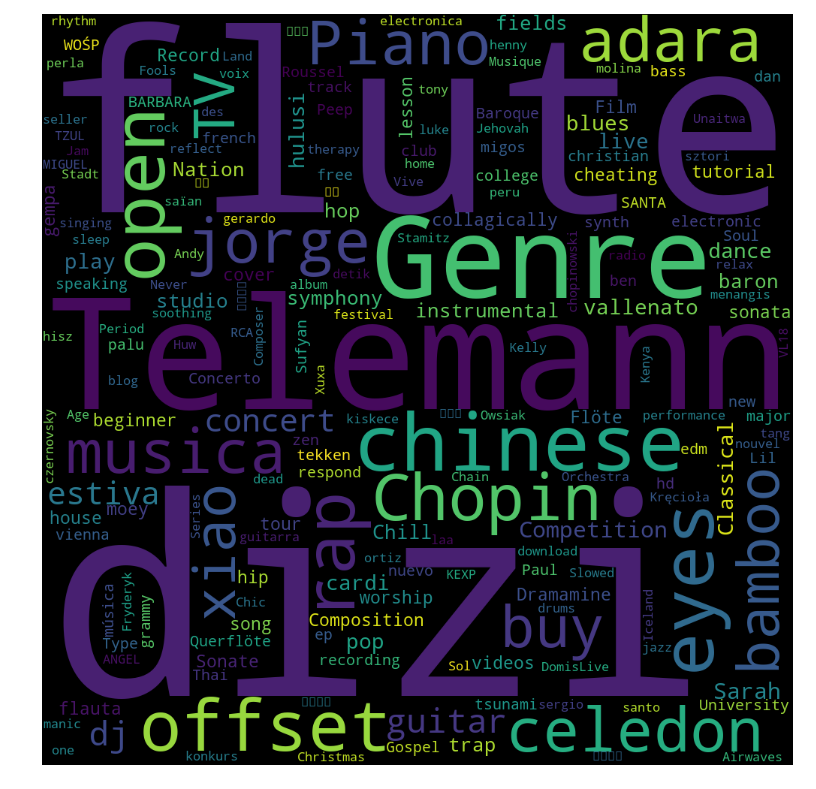

In [43]:
print_k_word_cloud(10,'tags', max_entries=100)
"Chinese (dizi music), festivals. and offset"

'relaxing sleep music'

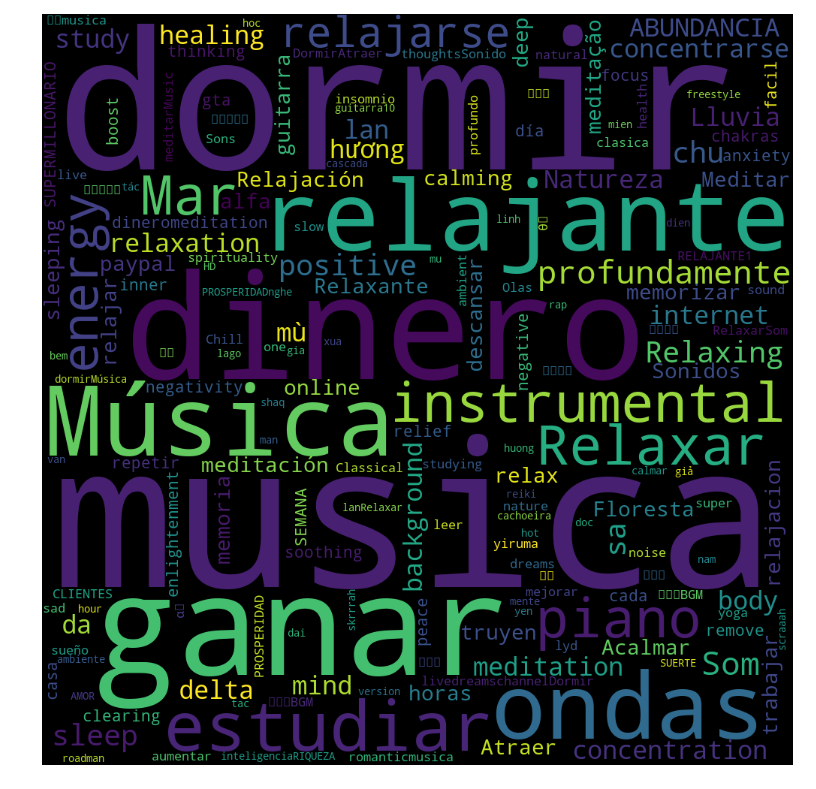

In [42]:
print_k_word_cloud(11,'tags', max_entries=200)
"relaxing sleep music"

'trap music is scary, sertanejo and reggateon more agressive than rap'

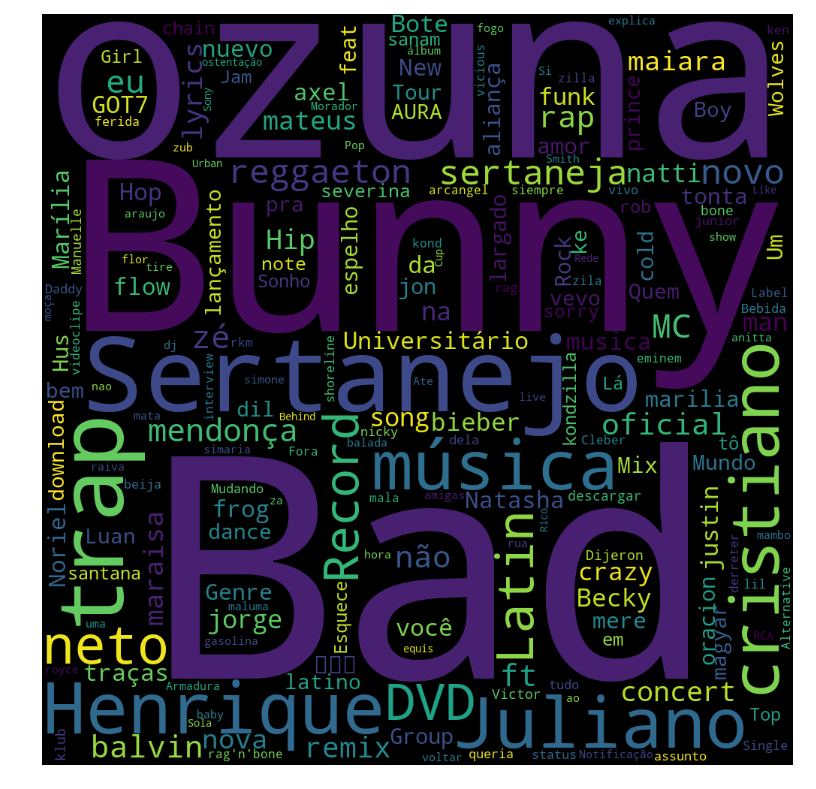

In [41]:
print_k_word_cloud(12,'tags', max_entries=300)
"trap music is scary, sertanejo and reggateon more agressive than rap"

# <a class="anchor" id="2.0-bullet">2. KClass Analysis</a>

In [59]:
for i in range(12):
    print('    k:  {}, count: {}'.format(i, df_classified[(df_classified.tags.str.contains('lyric'))&(df_classified.kclass==i)].shape[0]   ))

    k:  0, count: 132
    k:  1, count: 36
    k:  2, count: 27
    k:  3, count: 69
    k:  4, count: 6
    k:  5, count: 1
    k:  6, count: 65
    k:  7, count: 90
    k:  8, count: 85
    k:  9, count: 92
    k:  10, count: 8
    k:  11, count: 0


In [37]:
rap_words = ['rap', 'hip', 'hop']
pop_words = ['pop', 'hit']
country_words = ['country', 'western']
rock_words = ['rock']
jazz_words = ['jazz']
blues_words = ['blues', 'rhythm']
edm_words = ['edm', 'house', 'dance', 'electr', 'dubstep']
relax_words = ['relax', 'dormir', 'relaja', 'sleep', 'study', 'medit', 'zen', 'trabaja', 'estud', 'ambient']
latin_words = ['latin', 'musica,']
other_rock_words = ['metal', 'heavy', 'punk']
classical_words = ['classical', 'composer', 'symphony', 'sonata', 'concerto', 'beethoven', 'bach']
folk_words = ['folk', 'banjo', 'indie']
reggae_words = ['reggae,']
halloween_words = ['creepy', 'halloween', 'eerie', 'horror', 'wolves']

In [6]:
genre_list = [rap_words,pop_words, country_words, rock_words, jazz_words, blues_words, edm_words, 
              relax_words, latin_words, other_rock_words, classical_words,
              folk_words,reggae_words, halloween_words]
genre_list_str = ['rap_words','pop_words', 'country_words', 'rock_words', 'jazz_words', 'blues_words', 'edm_words', 
              'relax_words', 'latin_words', 'other_rock_words', 'classical_words',
              'folk_words','reggae_words', 'halloween_words']

In [7]:
df_classified.columns

Index(['level_0', 'index', 'caption', 'channelTitle', 'commentCount',
       'defaultLanguage', 'definition', 'description', 'dislikeCount',
       'duration', 'favoriteCount', 'licensedContent', 'likeCount',
       'publishedAt', 'regionRestriction', 'tags', 'title', 'vidId',
       'viewCount', 'request_token', 'letter_search', 'contentRating', 'year',
       'month', 'month_day', 'year_day', 'week_day', 'view_log', 'comment_log',
       'like_log', 'dislike_log', 'view_class', 'week',
       'description_sentiment', 'description_wordcount', 'tags_sentiment',
       'tags_wordcount', 'title_sentiment', 'title_wordcount',
       'title_featuring', 'intitle_a', 'intitle_b', 'intitle_c', 'intitle_d',
       'intitle_e', 'intitle_f', 'intitle_g', 'intitle_h', 'intitle_i',
       'intitle_j', 'intitle_k', 'intitle_l', 'intitle_m', 'intitle_n',
       'intitle_o', 'intitle_p', 'intitle_q', 'intitle_r', 'intitle_s',
       'intitle_t', 'intitle_u', 'intitle_v', 'intitle_w', 'intitle_x',
   

In [8]:
df_tagged = df_classified

In [9]:
df_tagged = df_classified.loc[:, ['tags', 'publishedAt', 'description_sentiment', 'duration','tags_sentiment','title_length', 'lv_ratio',
       'comment_view_ratio', 'like_dislike_ratio',  'kclass',
                                 'title', 'view_log', 'vidId']].reindex()

In [10]:
for i in range(len(genre_list)):
    df_tagged[genre_list_str[i]] = df_tagged.tags.map(lambda x: 1*(len([element for element in genre_list[i] if element in str(x)])>0))

In [11]:
df_tagged['vidId'] = df_tagged.vidId.map(lambda x: 'https://www.youtube.com/watch?v='+str(x))

In [12]:
#df_tagged.to_csv('./data/classifieds/classified_genres4.csv', index=False)

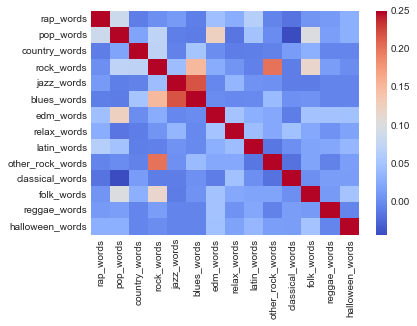

In [13]:
sns.heatmap(df_tagged.loc[:, genre_list_str].corr(), vmax=.25, cmap='coolwarm')

# <a class="anchor" id="3.0-bullet">3. Genres</a>

In [38]:
df_tagged['dubstep_words'] = df_tagged.tags.map(lambda x: 1 if 'dubstep' in str(x) else 0)
df_tagged['trap_words'] = df_tagged.tags.map(lambda x: 1 if 'trap' in str(x) else 0)

In [31]:
def genre_plotter(genre_words):
    df_for_corpus = df_tagged[df_tagged[genre_words]==1].reset_index()
    df_for_corpus['tags'] =df_for_corpus['tags'].map(lambda x: '' if 'à' in str(x) or 'Ð' in str(x) else x)

    corpus_string4 = ''
    for i in range(df_for_corpus.shape[0]):
        corpus_string4 = corpus_string4 + str(df_for_corpus.iloc[i]['tags'])

    mycloud_4 = WordCloud(width=1000, height=1000, stopwords=stopwords.words('english')+custom_pops+stopwords.words('spanish'),random_state=42,
                        collocations=False, #get rid of duplicates
                       normalize_plurals=True).generate_from_text(corpus_string4)
    plt.figure(figsize = (10, 10), facecolor = None)
    plt.imshow(mycloud_4)
    plt.axis("off")
    plt.tight_layout(pad = 0)

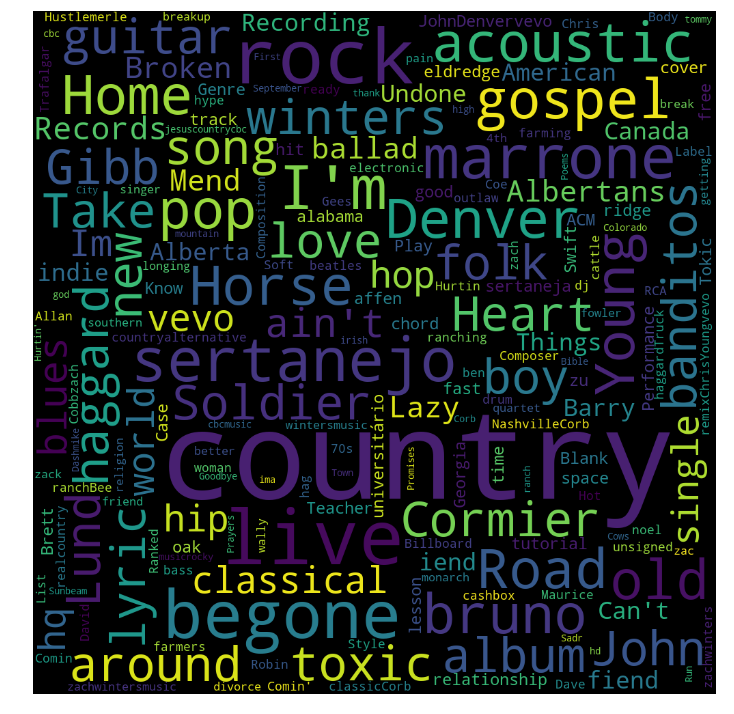

In [32]:
genre_plotter('country_words')

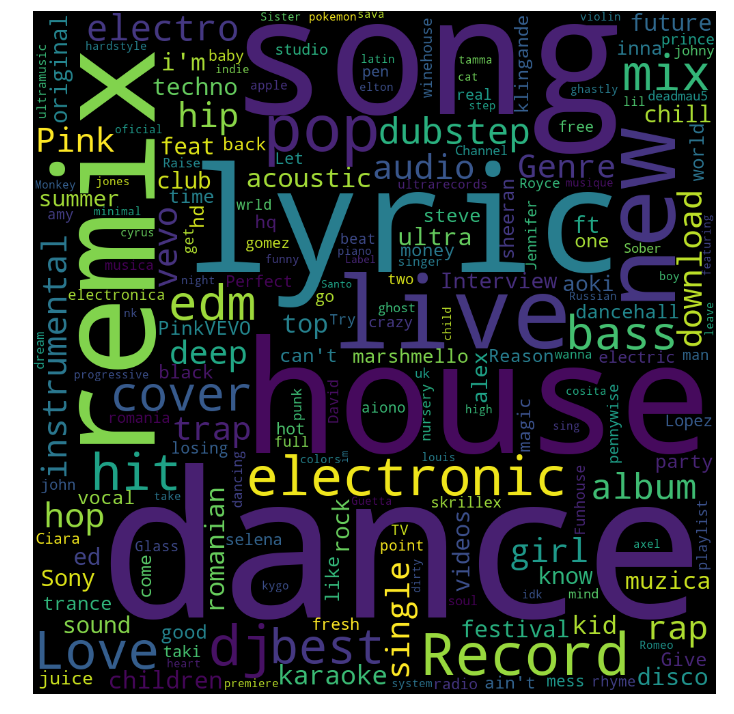

In [33]:
genre_plotter('edm_words')

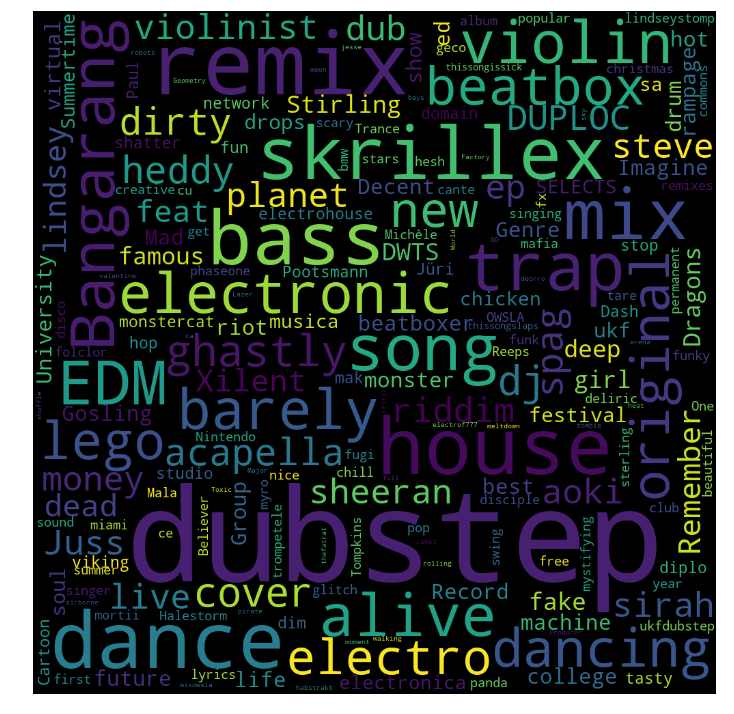

In [35]:
genre_plotter('dubstep_words')

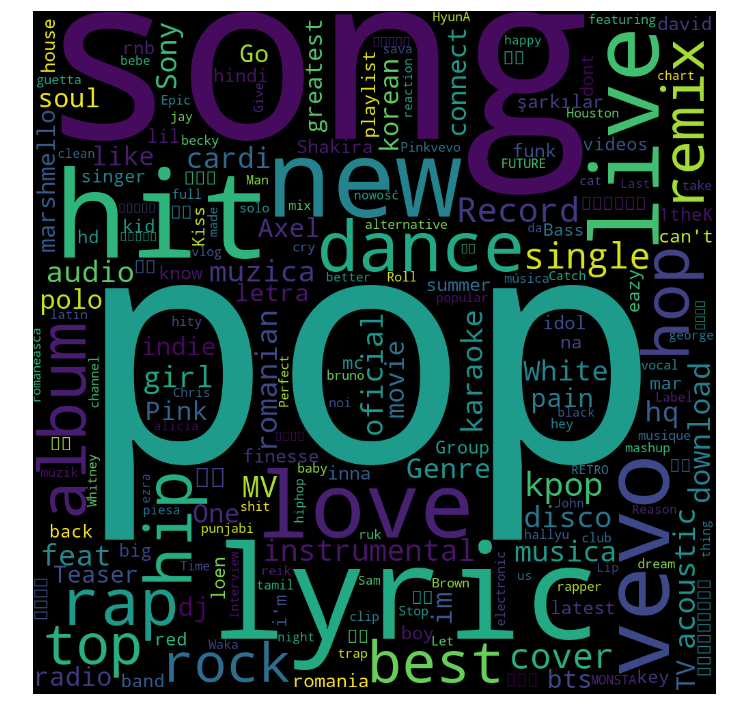

In [36]:
genre_plotter('pop_words')

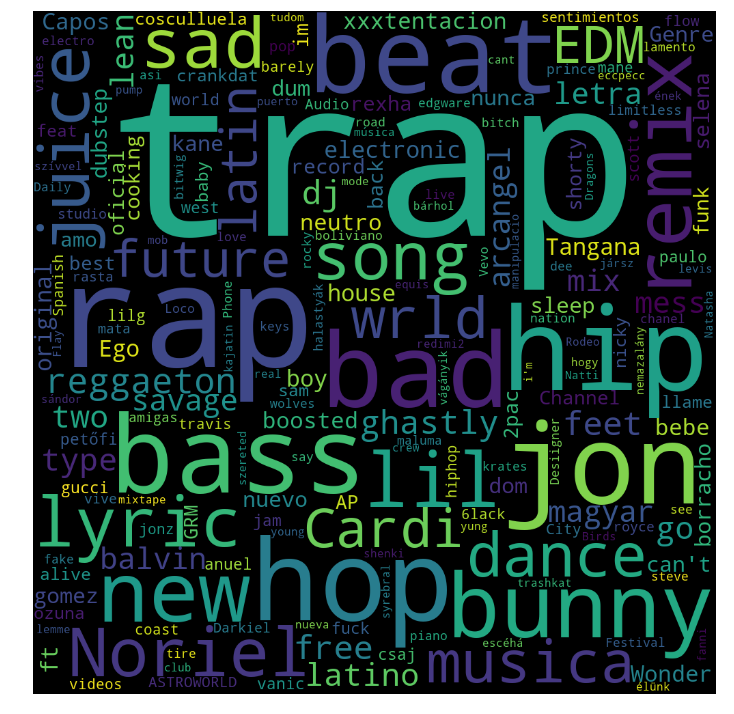

In [39]:
genre_plotter('trap_words')